In [1]:
import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats

In [4]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/impact/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'cits_match.csv'),
                  sep=",", low_memory=False)
data[['distname', 'year', 'doi_year', 'treat', 'year_centered', 'students_hisp', 'students_num']][data.doi == True].head()

,distname,year,doi_year,treat,year_centered,students_hisp,students_num
0,CAYUGA ISD,2012,2017.0,1,-5.0,0.050847,590
1,CAYUGA ISD,2013,2017.0,1,-4.0,0.075630,595
2,CAYUGA ISD,2014,2017.0,1,-3.0,0.070524,553
3,CAYUGA ISD,2015,2017.0,1,-2.0,0.064125,577
4,CAYUGA ISD,2016,2017.0,1,-1.0,0.070423,568


In [5]:
data[data.doi == False][['distname','doi', 'doi_year', 'year', 'treat']].head()

,distname,doi,doi_year,year,treat
49,ANDREWS ISD,False,NaN,2012,0
50,ANDREWS ISD,False,NaN,2013,0
51,ANDREWS ISD,False,NaN,2014,0
52,ANDREWS ISD,False,NaN,2015,0
53,ANDREWS ISD,False,NaN,2016,0


In [6]:
data[data.year == 2014].doi_year.value_counts().sort_index()

2016.0     52
2017.0    560
2018.0     93
2019.0      1
Name: doi_year, dtype: int64

# ITS

In [62]:
df = pd.DataFrame(data.groupby(['year']).agg({'avescores': 'mean'})).reset_index()

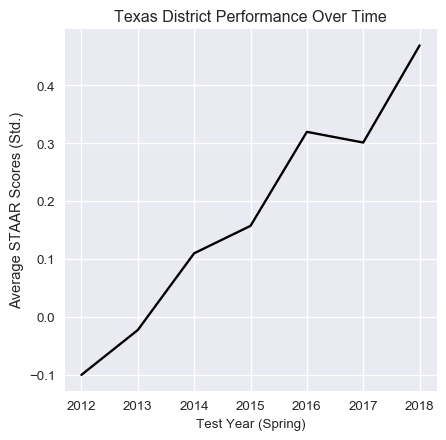

In [65]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df.year, df.avescores, color = 'black')

plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Texas District Performance Over Time')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'its.png', dpi = 600, bbox_inches="tight")
plt.show()

# Graph by year of implementation

In [38]:
def create_group_df(df):
    new_df = pd.DataFrame(df.groupby(['year']).agg({'avescores': ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df['avescores']['score_mean'] + new_df['avescores']['score_se']
    new_df['lb'] = new_df['avescores']['score_mean'] - new_df['avescores']['score_se']
    return new_df
df_control = create_group_df(data[data.doi == False])
df_treat2016 = create_group_df(data[data.doi_year == 2016])
df_treat2017 = create_group_df(data[data.doi_year == 2017])
df_treat2018 = create_group_df(data[data.doi_year == 2018])
df_control

avescores                  ub        lb
     score_mean  score_se                    
year                                         
2012  -0.253841  0.047918 -0.205924 -0.301759
2013  -0.170943  0.049657 -0.121286 -0.220600
2014  -0.046143  0.049188  0.003045 -0.095332
2015   0.030988  0.048954  0.079941 -0.017966
2016   0.206349  0.049478  0.255826  0.156871
2017   0.152806  0.054572  0.207378  0.098233
2018   0.365454  0.052116  0.417569  0.313338

# Full Set of Years and Groups

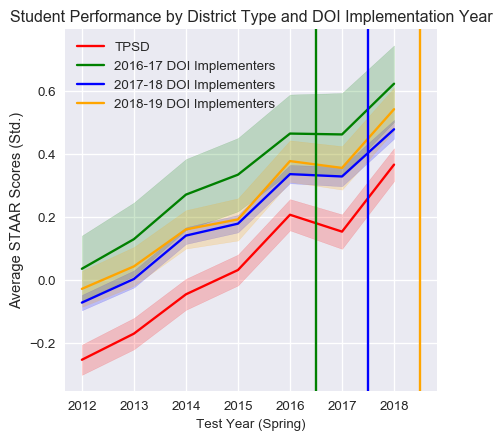

In [56]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.index, df_control['avescores']['score_mean'], color = 'red', label = 'TPSD')
plt.plot(df_treat2016.index, df_treat2016['avescores']['score_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(df_treat2017.index, df_treat2017['avescores']['score_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(df_treat2018.index, df_treat2018['avescores']['score_mean'], color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()


plt.fill_between(df_control.index, df_control.lb, df_control.ub, color = 'red', alpha = .2)
plt.fill_between(df_treat2016.index, df_treat2016.lb, df_treat2016.ub, color = 'green', alpha = .2)
plt.fill_between(df_treat2017.index, df_treat2017.lb, df_treat2017.ub, color = 'blue', alpha = .2)
plt.fill_between(df_treat2018.index, df_treat2018.lb, df_treat2018.ub, color = 'orange', alpha = .2)

plt.axvline(x = 2016.5, color = 'green')
plt.axvline(x = 2017.5, color = 'blue')
plt.axvline(x = 2018.5, color = 'orange')



plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'all districts and dates.png', dpi = 600, bbox_inches="tight")
plt.show()

# Centered
We're not looking at this graph for evidence of parallel trends. Just to look at the impact.

# Evidence of Parallel Trends

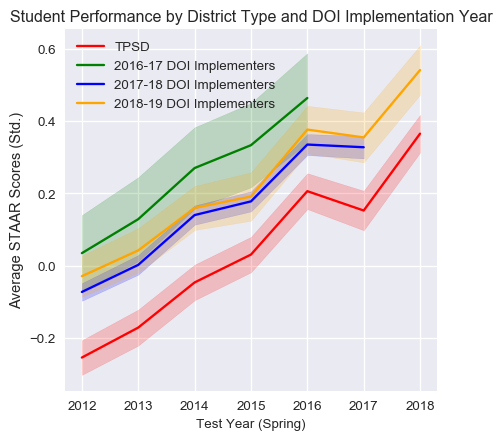

In [57]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.index, df_control['avescores']['score_mean'], color = 'red', label = 'TPSD')
plt.plot(df_treat2016[df_treat2016.index <= 2016].index, df_treat2016[df_treat2016.index <= 2016]['avescores']['score_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(df_treat2017[df_treat2017.index <= 2017].index, df_treat2017[df_treat2017.index <= 2017]['avescores']['score_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(df_treat2018[df_treat2018.index <= 2018].index, df_treat2018[df_treat2018.index <= 2018]['avescores']['score_mean'], color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()

plt.fill_between(df_control.index, df_control.lb, df_control.ub, color = 'red', alpha = .2)
plt.fill_between(df_treat2016[df_treat2016.index <= 2016].index, df_treat2016[df_treat2016.index <= 2016].lb, df_treat2016[df_treat2016.index <= 2016].ub, color = 'green', alpha = .2)
plt.fill_between(df_treat2017[df_treat2017.index <= 2017].index, df_treat2017[df_treat2017.index <= 2017].lb, df_treat2017[df_treat2017.index <= 2017].ub, color = 'blue', alpha = .2)
plt.fill_between(df_treat2018[df_treat2018.index <= 2018].index, df_treat2018[df_treat2018.index <= 2018].lb, df_treat2018[df_treat2018.index <= 2018].ub, color = 'orange', alpha = .2)


plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')

plt.savefig(table_path + 'parallel_trends_by_adoption.png', bbox_inches="tight")

plt.show()

# Weighted Parallel Trends

total_weight_TPSD = sum(data[data.treat == 0].psweight)
total_weight_DOI16 = sum(data[data.doi_year == 2016].psweight)
total_weight_DOI17 = sum(data[data.doi_year == 2017].psweight)
total_weight_DOI18 = sum(data[data.doi_year == 2018].psweight)
data['pswtshare2'] = np.where(data.treat == 0, (data.psweight/total_weight_TPSD),
                          np.where(data.doi_year == 2016,(data.psweight/total_weight_DOI16),
                          np.where(data.doi_year == 2017, (data.psweight/total_weight_DOI17), 
                                  np.where(data.doi_year == 2018, (data.psweight/total_weight_DOI18), 0))))
sum(data[data.doi == False].pswtshare2)
data['score_weighted'] = (data.avescores * data.pswtshare2)
data[data.doi == False][['distname','avescores', 'pswtshare2', 'score_weighted']].head()

df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['score_weighted'].sum()).reset_index()
df_control

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.score_weighted, color = 'red', label = 'TPSD')
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].score_weighted, color = 'green', label = '2016-17 DOI Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].score_weighted, color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].score_weighted, color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()



plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()
#TODO: WTF the trends and scale

# DOI vs TPS

In [47]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['avescores'].mean()).reset_index()
df_treat = pd.DataFrame(data[data.doi == True].groupby(['year'])['avescores'].mean()).reset_index()
df_treat

,year,avescores
0,2012,-0.057750
1,2013,0.018244
2,2014,0.153262
3,2015,0.192345
4,2016,0.351232
5,2017,0.342197
6,2018,0.497711


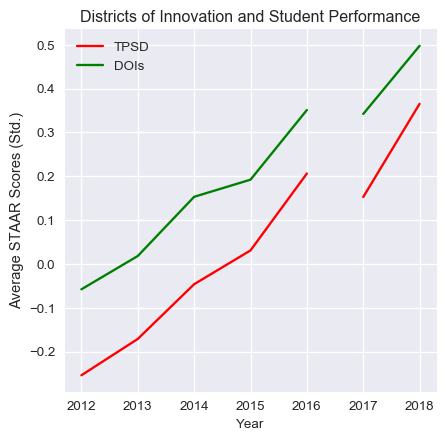

In [48]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control[df_control.year < 2017].year, df_control[df_control.year < 2017].avescores, color = 'red', label = 'TPSD')
plt.plot(df_treat[df_treat.year < 2017].year, df_treat[df_treat.year < 2017].avescores, color = 'green', label = 'DOIs')
plt.legend()

plt.plot(df_control[df_control.year >= 2017].year, df_control[df_control.year >= 2017].avescores, color = 'red')
plt.plot(df_treat[df_treat.year >= 2017].year, df_treat[df_treat.year >= 2017].avescores, color = 'green')





plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')


plt.show()


# Weighted Average

In [55]:
data['score_weighted'] = (data.avescores * data.pswtshare)/100
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat = pd.DataFrame(data[data.doi == True].groupby(['year'])['score_weighted'].sum()).reset_index()
df_control

,year,score_weighted
0,2012,-0.104937
1,2013,-0.017993
2,2014,0.091327
3,2015,0.178334
4,2016,0.313546
5,2017,0.241962
6,2018,0.446074


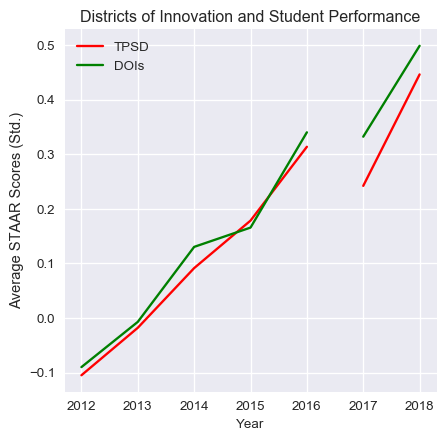

In [56]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control[df_control.year < 2017].year, df_control[df_control.year < 2017].score_weighted, color = 'red', label = 'TPSD')
plt.plot(df_treat[df_treat.year < 2017].year, df_treat[df_treat.year < 2017].score_weighted, color = 'green', label = 'DOIs')
plt.legend()

plt.plot(df_control[df_control.year >= 2017].year, df_control[df_control.year >= 2017].score_weighted, color = 'red')
plt.plot(df_treat[df_treat.year >= 2017].year, df_treat[df_treat.year >= 2017].score_weighted, color = 'green')





plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')


plt.show()

# Demographic Trends

In [241]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018

,year,students_hisp
0,2012,0.345833
1,2013,0.352336
2,2014,0.360391
3,2015,0.365873
4,2016,0.370989
5,2017,0.373655
6,2018,0.373655


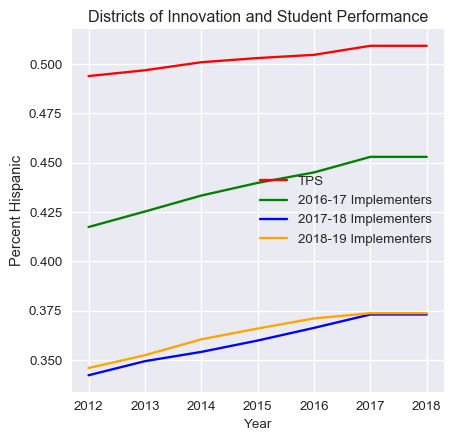

In [242]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.students_hisp, color = 'red', label = 'TPS')
plt.plot(df_treat2016.year, df_treat2016.students_hisp, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017.year, df_treat2017.students_hisp, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018.year, df_treat2018.students_hisp, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Percent Hispanic')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

In [232]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2018

,year,students_num
0,2012,5311.118280
1,2013,5381.946237
2,2014,5442.838710
3,2015,5491.838710
4,2016,5535.032258
5,2017,5571.634409
6,2018,5571.634409


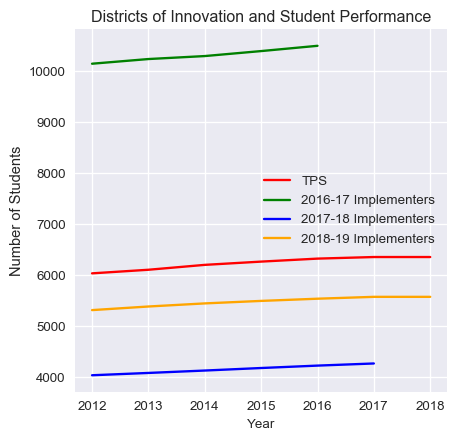

In [233]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.students_num, color = 'red', label = 'TPS')
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].students_num, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].students_num, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].students_num, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Number of Students')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

In [239]:
#  Who are 2016-17 implementers
data[(data.doi_year == 2016) & (data.year == 2018)][['distname', 'students_num']]


,distname,students_num
34,PALESTINE ISD,3453
48,SLOCUM ISD,411
293,ALAMO HEIGHTS ISD,4838
321,SAN ANTONIO ISD,52486
573,PEARLAND ISD,21516
748,HARLINGEN ISD,18614
762,LOS FRESNOS ISD,10827
769,POINT ISABEL ISD,2474
930,CHILDRESS ISD,1132
972,BRONTE ISD,256
